LTC 1 did not forget within the simulation time.
LTC 2 did not forget within the simulation time.
LTC 3 did not forget within the simulation time.


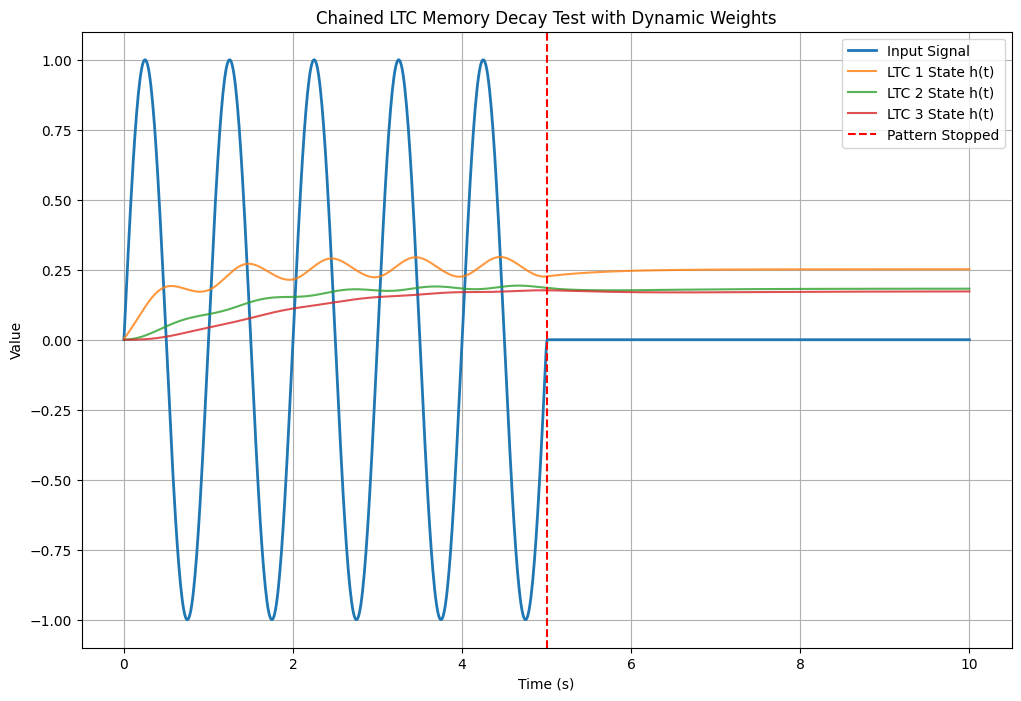

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_ltc = 3         # Number of LTC neurons in chain
tau = 1.0           # Time constant of LTC
gleak = 0.5         # Leak conductance
cm_t = 1.0          # Membrane capacitance
dt = 0.01           # Time step
total_time = 10.0   # Total simulation time
pattern_time = 5.0  # Duration of feeding the pattern
threshold = 0.05    # Threshold to determine "forgetting"

num_steps = int(total_time / dt)
pattern_steps = int(pattern_time / dt)

# Create time array and input signal
t = np.linspace(0, total_time, num_steps)
freq = 1.0
input_signal = np.zeros(num_steps)
for i in range(pattern_steps):
    input_signal[i] = np.sin(2 * np.pi * freq * t[i])

# Sigmoid function
def sigmoid(x, mu=0.5, sigma=1.0):
    return 1 / (1 + np.exp(-sigma * (x - mu)))

# Simulating chain of LTC neurons
h_vals = np.zeros((num_ltc, num_steps))  # Store states for each neuron
h = np.zeros(num_ltc)  # Current state of each neuron
weights = np.random.uniform(0.5, 1.5, num_ltc)  # Dynamic weights for each neuron

for i in range(num_steps):
    # First neuron gets modulated input signal
    u = sigmoid(input_signal[i])
    dh0 = (1.0 / tau) * (u - h[0]) - gleak * h[0]
    h[0] = h[0] + dt * dh0 / cm_t  # Update with leaky dynamics
    
    # Subsequent neurons get input from previous neuron
    for j in range(1, num_ltc):
        dh = (1.0 / tau) * (weights[j-1] * h[j-1] - h[j]) - gleak * h[j]
        h[j] = h[j] + dt * dh / cm_t  # Update with leaky dynamics
    
    # Store all states
    h_vals[:, i] = h

# Plot Results
plt.figure(figsize=(12, 8))
plt.plot(t, input_signal, label='Input Signal', linewidth=2)
for i in range(num_ltc):
    plt.plot(t, h_vals[i], label=f'LTC {i+1} State h(t)', alpha=0.8)
plt.axvline(pattern_time, color='r', linestyle='--', label='Pattern Stopped')

# Find forgetting times for each neuron
for i in range(num_ltc):
    forget_time = None
    for idx in range(pattern_steps, num_steps):
        if abs(h_vals[i, idx]) < threshold:
            forget_time = t[idx] - pattern_time
            plt.axvline(pattern_time + forget_time, color=f'C{i+1}', 
                        linestyle=':', label=f'LTC {i+1} Forgetting')
            break
    if forget_time is not None:
        print(f"LTC {i+1} Time to forget: {forget_time:.2f}s")
    else:
        print(f"LTC {i+1} did not forget within the simulation time.")

plt.title("Chained LTC Memory Decay Test with Dynamic Weights")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()